**주파수 변환과 필터**

In [107]:
import matplotlib.pyplot as plt
import numpy as np

import pywt
from filterpy.kalman import KalmanFilter

데이터 생성

In [121]:
# 0부터 10까지 500개의 시간 값 생성. 이산 신호
bits=500 # 비트 수
scale=10 # 길이

pi = np.pi # 파이 3.1415.....
t = np.linspace(0,10, bits)

사인 함수

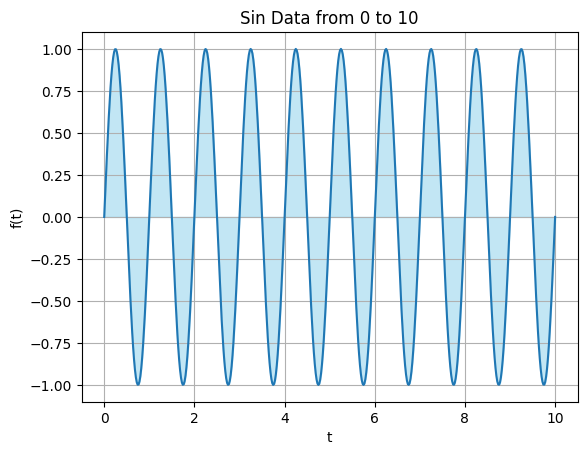

In [125]:
# 시간(t),주파수(f),진폭(amp),평행이동(s),수평이동(c)
def sin_graph(t,f,amp,s,c):
    sin_data = amp * np.sin(2*pi*f*(t-s)+c)
    return sin_data

# 사인(sin) 데이터 생성
sin_data=sin_graph(t, 1, 1, 0, 0)

# 그래프로 데이터 시각화
plt.plot(t, sin_data)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Sin Data from 0 to 10')
plt.fill_between(f, sin_data, color= 'skyblue', alpha=0.5)
plt.grid()
plt.show()

1~10Hz까지 주파수의 사인 함수

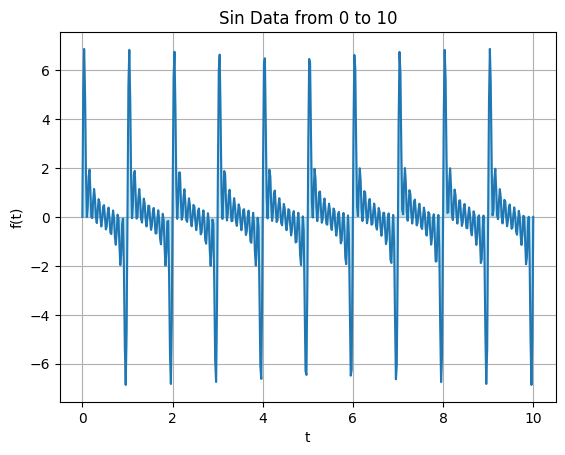

In [133]:
# 사인(sin) 데이터 생성
sin_10_data=np.zeros((500))

for k in range(10):
    sin_10_data+=sin_graph(t, k, 1, 0, 0)

# 그래프로 데이터 시각화
plt.plot(t, sin_10_data)
plt.fill_between(f, sin_10_data, color= 'skyblue', alpha=0.5)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Sin Data from 0 to 10')
plt.grid()
plt.show()

가산 백색 가우스 잡음(AWGN)

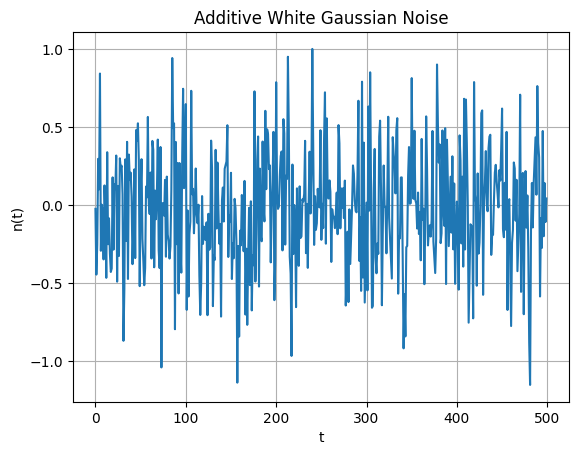

In [228]:
white = np.random.randn(500)
white = white/max(white)

plt.plot(white)
plt.title('Additive White Gaussian Noise')
plt.xlabel('t')
plt.ylabel('n(t)')
plt.grid()

노이즈있는 사인 함수

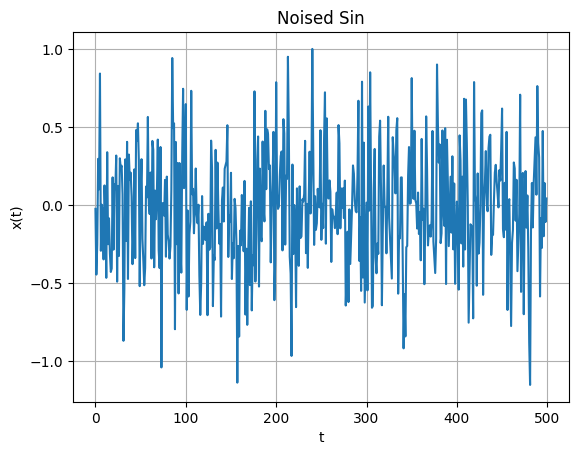

In [229]:
white_sin=sin_data+white

plt.plot(white)
plt.title('Noised Sin')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()

이산 푸리에 변환(DFT)

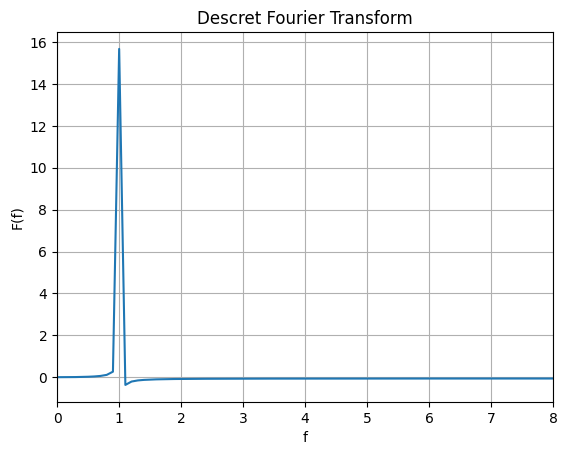

In [280]:
def Descrete_Fourier_Transform(input):
    N = len(input)
    dft_result = np.zeros(N, dtype=np.complex128)

    for k in range(N):
        for n in range(N):
            dft_result[k] += input[n] * np.exp(-2j * pi * k * n / N)

    return dft_result

# 1Hz Sin 함수 DFT 수행
dft_sin = Descrete_Fourier_Transform(sin_data)
f = np.linspace(0, 50, 500)

plt.plot(f,dft_sin)
plt.xlim(0,8)
plt.xlabel('f')
plt.ylabel('F(f)')
plt.title('Descret Fourier Transform')
plt.grid()

이런식으로 나온것 

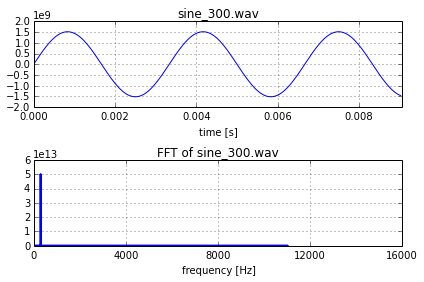

빠른 푸리에 변환(FFT)

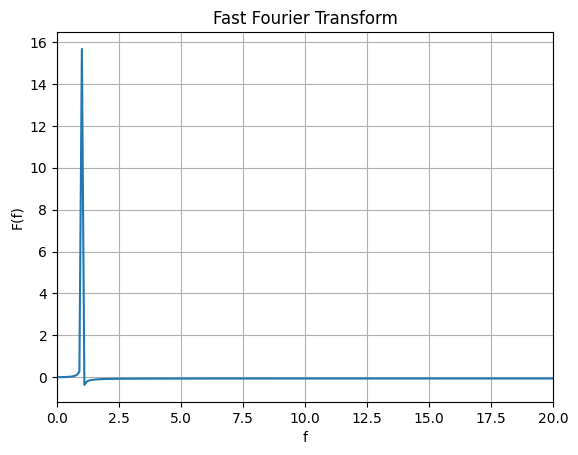

In [289]:
def Fast_Fourier_Transform(input):
    fft_result = np.fft.fft(input)
    return fft_result

# 1Hz Sin 함수 FFT 수행
fft_sin=Fast_Fourier_Transform(sin_data)

plt.plot(f,fft_sin)
plt.xlim(0,20)
plt.xlabel('f')
plt.ylabel('F(f)')
plt.title('Fast Fourier Transform')
plt.grid()
plt.show()

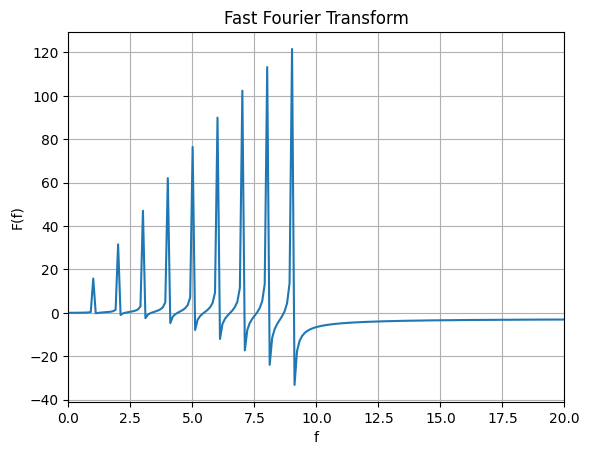

In [285]:
# 1~10Hz Sin 함수 FFT 수행
fft_sin_10=Fast_Fourier_Transform(sin_10_data)

plt.plot(f,fft_sin_10)
plt.xlim(0,20)
plt.xlabel('f')
plt.ylabel('F(f)')
plt.title('Fast Fourier Transform')
plt.grid()
plt.show()

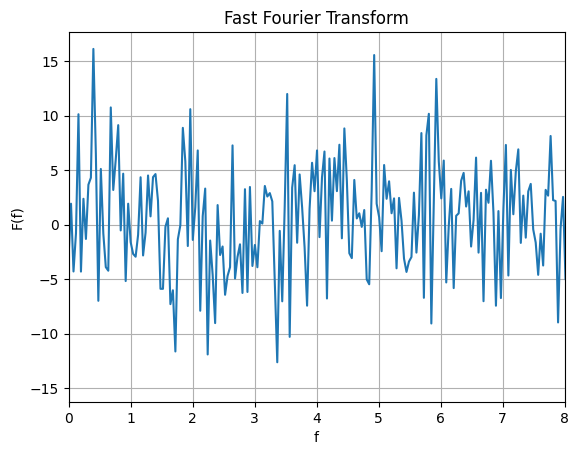

In [291]:
# White Sin 함수 FFT 수행
fft_white_sin=Fast_Fourier_Transform(white_sin)
f = np.linspace(0, 20, 500)

plt.plot(f,fft_white)
plt.xlim(0,8)
plt.xlabel('f')
plt.ylabel('F(f)')
plt.title('Fast Fourier Transform')
plt.grid()
plt.show()

저주파 통과 필터(LPF) ---- ** 필터들 주파수값 잘못 써둠

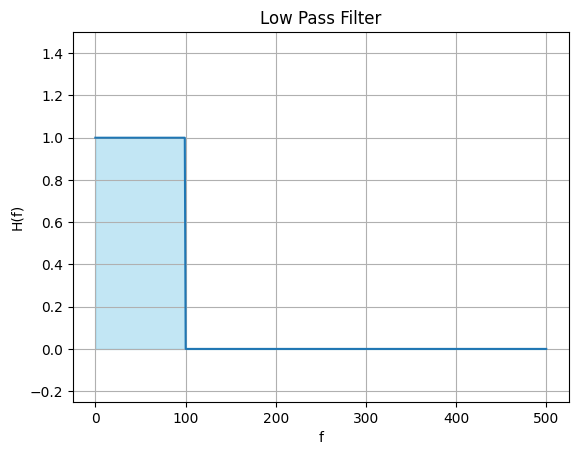

In [315]:
fs=100 # 샘플 주파수(어디까지 자를건지 결정)

lpf=np.append(np.ones((fs)), np.zeros((bits-fs)))
f=np.linspace(0,500,bits)

plt.plot(f,lpf)
plt.fill_between(f, lpf, color= 'skyblue', alpha=0.5)
plt.ylim(-0.25,1.5)
plt.grid()
plt.xlabel('f')
plt.ylabel('H(f)')
plt.title('Low Pass Filter')
plt.show()


In [316]:
def Low_Pass_Filter(input,fs):
    lpf=np.append(np.ones((fs)), np.zeros((500-fs)))
    return input*lpf

c:\Users\jtkan\AppData\Local\Programs\Python\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'LPFed FFT 1Hz Sin')

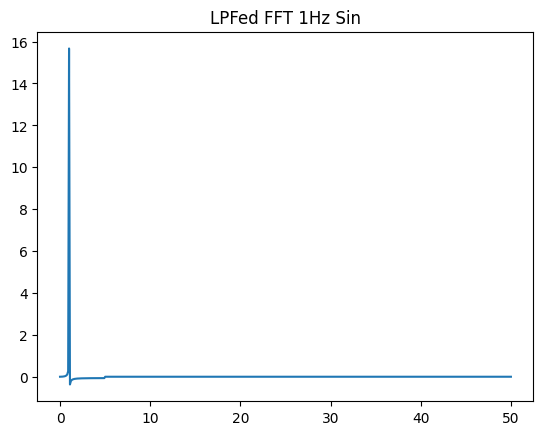

In [317]:
# sin 저역통과
f=np.linspace(0,50,bits)
lpf_sin=Low_Pass_Filter(fft_sin,50)
plt.plot(f,lpf_sin)
plt.title('LPFed FFT 1Hz Sin')

Text(0.5, 1.0, 'LPFed FFT 1~10Hz Sin')

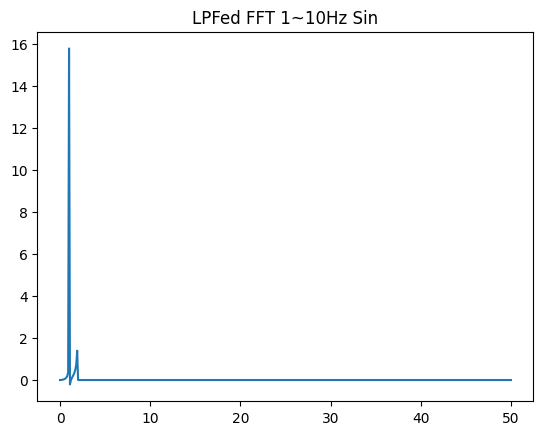

In [301]:
#1~10Hz sin 저역통과
lpf_sin_10=Low_Pass_Filter(fft_sin_10,20)
plt.plot(f,lpf_sin_10)
plt.title('LPFed FFT 1~10Hz Sin')

Text(0.5, 1.0, 'LPFed FFT White Sin')

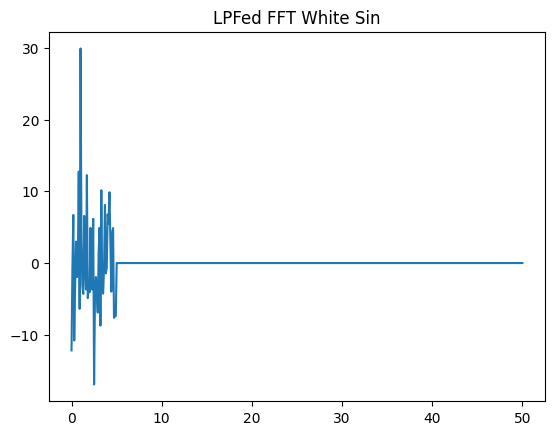

In [302]:
# white sin 저역통과
lpf_white_sin=Low_Pass_Filter(fft_white_sin,50)
plt.plot(f,lpf_white_sin)
plt.title('LPFed FFT White Sin')

푸리에 역변환

In [304]:
def Inverse_Fast_Fourier_Transform(input):
    ifft_result = np.fft.ifft(input)
    return ifft_result

c:\Users\jtkan\AppData\Local\Programs\Python\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'IFFT 1Hz Sin')

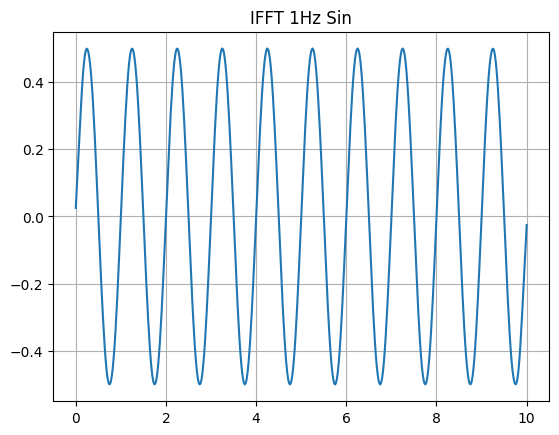

In [306]:
# sin 저역통과 역변환 -> 계산중 손실로 amplitude 작아짐 
iff_sin=Inverse_Fast_Fourier_Transform(lpf_sin)
f=np.linspace(0,10,bits)

plt.plot(f,iff_sin)
plt.grid()
plt.title('IFFT 1Hz Sin')

Text(0.5, 1.0, 'IFFT 1~10Hz Sin')

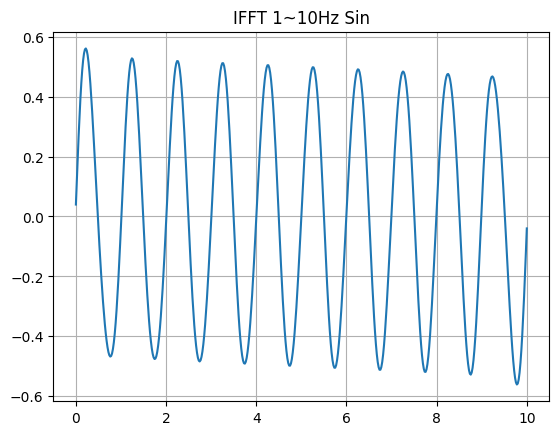

In [307]:
# 1~10Hz sin 저역통과 역변환 -> 계산중 손실로 amplitude 작아짐 
iff_sin_10=Inverse_Fast_Fourier_Transform(lpf_sin_10)

plt.plot(f,iff_sin_10)
plt.grid()
plt.title('IFFT 1~10Hz Sin')

Text(0.5, 1.0, 'IFFT White Sin')

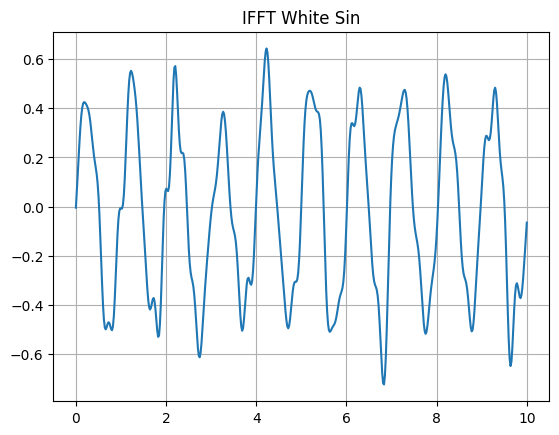

In [308]:
# white sin 저역통과 역변환 -> 계산중 손실로 amplitude 작아짐 
iff_white_sin=Inverse_Fast_Fourier_Transform(lpf_white_sin)

plt.plot(f,iff_white_sin)
plt.grid()
plt.title('IFFT White Sin')

대역 통과 필터(BPF)

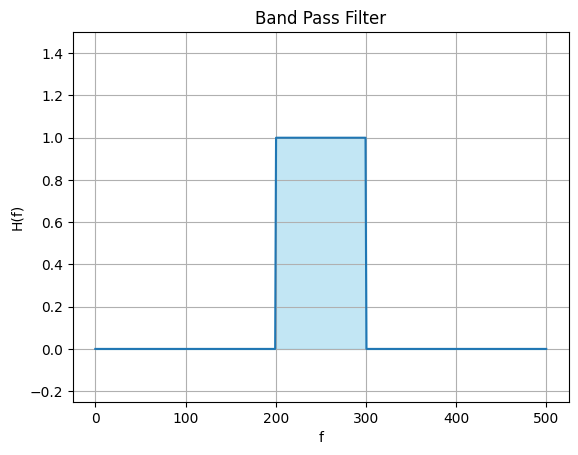

In [309]:
# 특정 대역만 설정해서 보는 필터
fa,fb=200,300
def Band_Pass_Filter():
    BPF = np.append(np.zeros((fa)),np.ones((fb-fa)))
    BPF = np.append(BPF,np.zeros((500-fb)))
    return BPF

bpf=Band_Pass_Filter()
f=np.linspace(0,500,500)

plt.plot(f,bpf)
plt.fill_between(f, bpf, color= 'skyblue', alpha=0.5)
plt.ylim(-0.25,1.5)
plt.grid()
plt.xlabel('f')
plt.ylabel('H(f)')
plt.title('Band Pass Filter')
plt.show()

고주파 통과 필터(HPF)

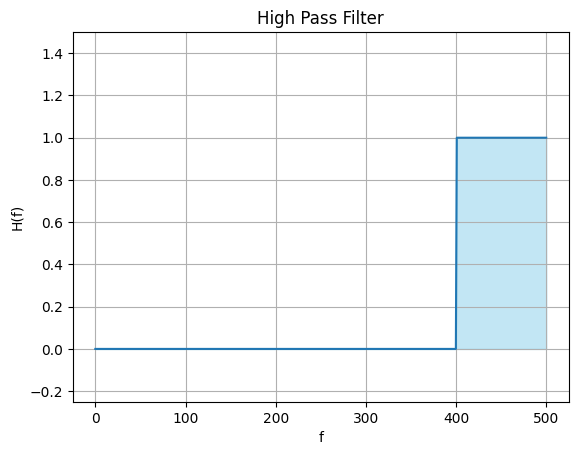

In [322]:
fs=400
f=np.linspace(0,500,500)

def High_Pass_Filter():
    HPF = np.append(np.zeros((fs)),np.ones((500-fs)))
    return HPF

hpf=High_Pass_Filter()

plt.plot(f,hpf)
plt.fill_between(f, hpf, color= 'skyblue', alpha=0.5)
plt.ylim(-0.25,1.5)
plt.grid()
plt.xlabel('f')
plt.ylabel('H(f)')
plt.title('High Pass Filter')
plt.show()

웨이블릿 변환 수행 ?

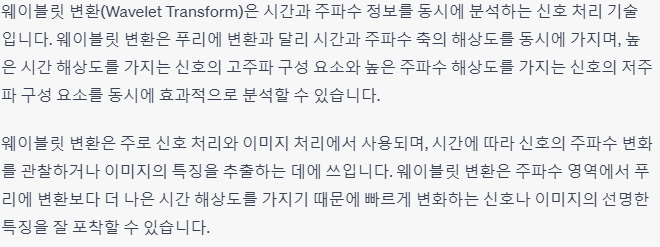

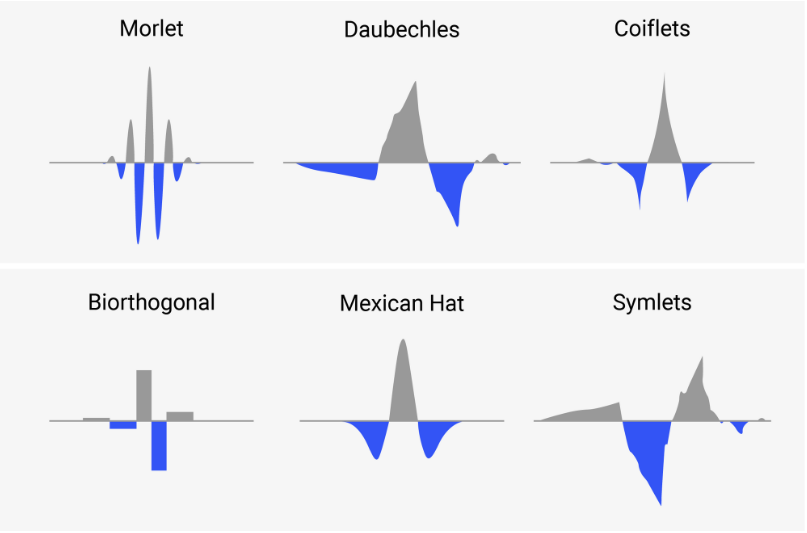

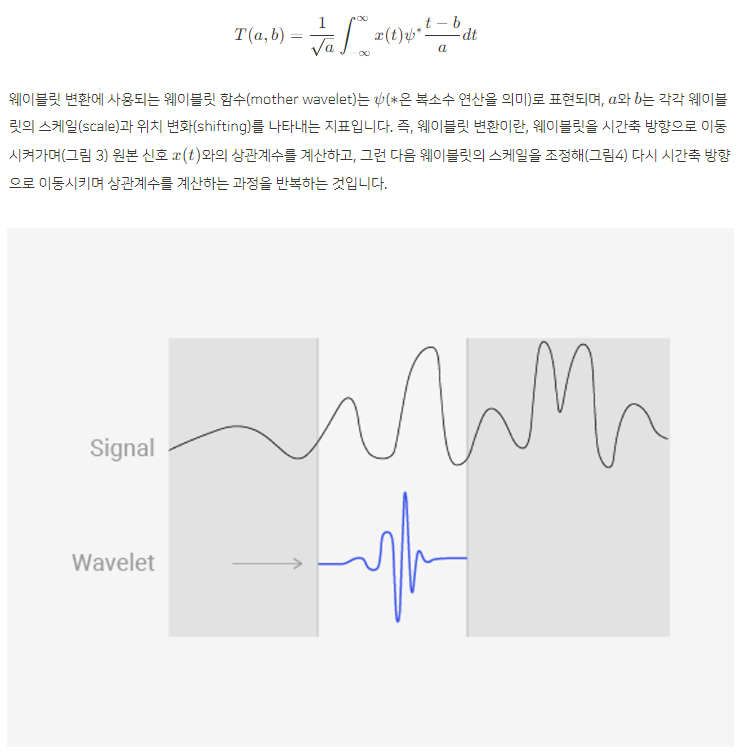

참고: https://tech.onepredict.ai/94d98ece-06be-4215-b5ef-87a58ab8d2e3

In [259]:
fs = 500  # 샘플링 주파수

# 웨이블릿 변환
def Wavelet_Transform(input):
    wavelet_sel = 'cmor'  # 웨이블릿 함수 선택 (예시로 Complex Morlet 사용)
    scales = np.arange(1, 128)  # 웨이블릿 스케일 범위 설정?
    coefficients, frequencies = pywt.cwt(input, scales, wavelet_sel, 1/fs)
    return coefficients, frequencies

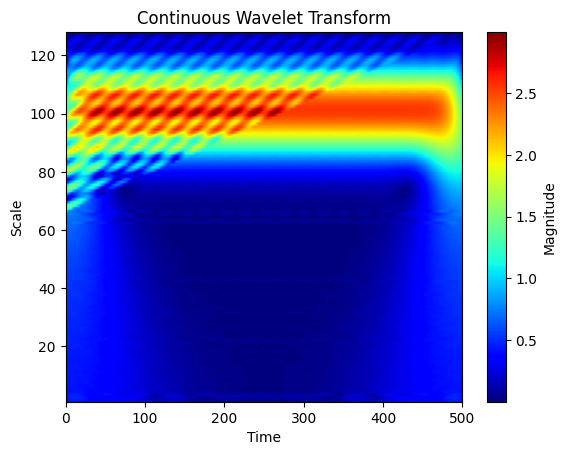

In [260]:
# 1Hz sin 웨이블릿 변환 그래프 그리기
coefficients, frequencies=Wavelet_Transform(sin_data)

plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, bits, 1, 128], cmap='jet')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform')
plt.show()

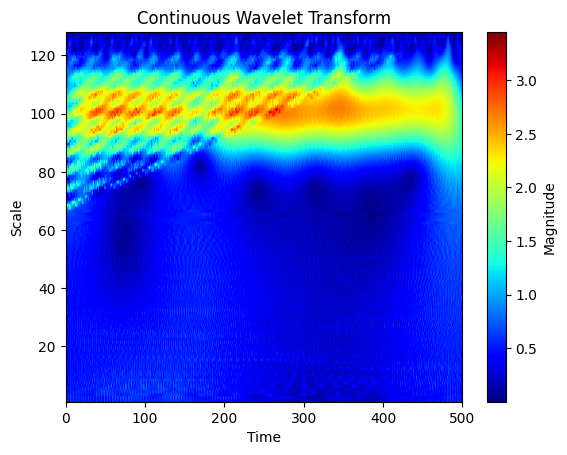

In [261]:
# white sin 웨이블릿 변환 그래프 그리기
coefficients, frequencies=Wavelet_Transform(white_sin)

plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, bits, 1, 128], cmap='jet')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform')
plt.show()

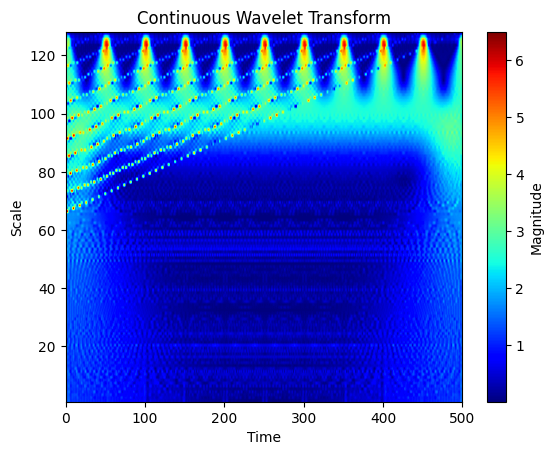

In [262]:
# 1~10Hz 웨이블릿 변환 그래프 그리기
coefficients, frequencies=Wavelet_Transform(sin_10_data)

plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, bits, 1, 128], cmap='jet')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('Continuous Wavelet Transform')
plt.show()

칼만 필터 ?

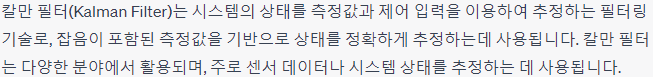

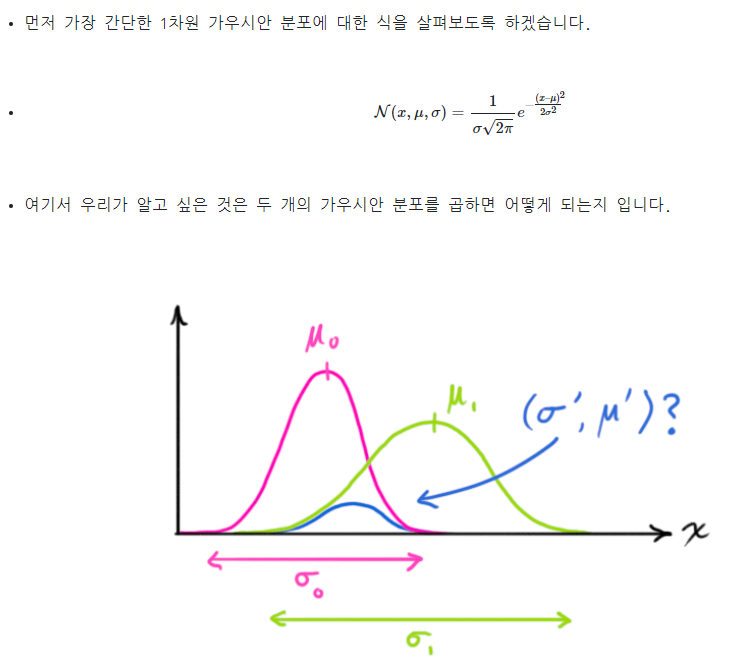

참고: https://gaussian37.github.io/ad-ose-lkf_basic/

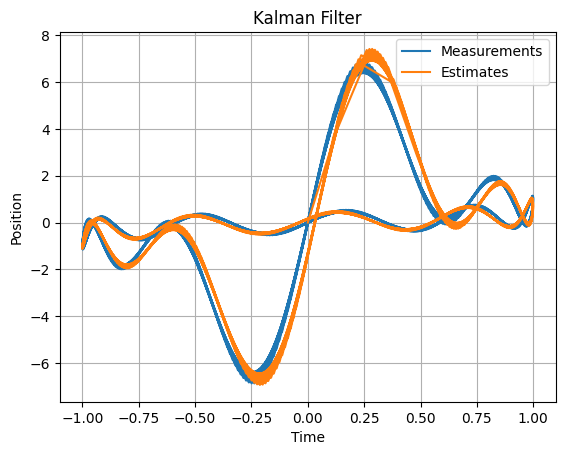

In [232]:
# 초기 상태 설정 (위치, 속도)
initial_state = np.array([0, 0])

# 시스템 행렬 (상태 전이 행렬)
transition_matrix = np.array([[1, 1],
                              [0, 1]])

# 측정 행렬 (측정값을 상태로 변환하는 행렬)
measurement_matrix = np.array([[1, 0]])

# 공분산 행렬 (시스템의 불확실성을 표현하는 행렬)
covariance_matrix = np.array([[0.1, 0.1],
                              [0.1, 0.1]])

# 프로세스 노이즈 행렬 (모델의 오차를 표현하는 행렬)
process_noise = 0.1

# 측정 노이즈 행렬 (측정값의 오차를 표현하는 행렬)
measurement_noise = 0.1

# 칼만 필터 객체 생성
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = initial_state
kf.F = transition_matrix
kf.H = measurement_matrix
kf.P = covariance_matrix
kf.Q = process_noise
kf.R = measurement_noise

# 추정값 리스트
estimates = []

# 칼만 필터 업데이트
for measurement in sin_10_data:
    kf.predict()
    kf.update(measurement)
    estimates.append(kf.x[0])

# 결과 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(sin_data, sin_10_data, label='Measurements')
plt.plot(sin_data, estimates, label='Estimates')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.title('Kalman Filter')
plt.show()

지수 이동 평균 필터(EMA)

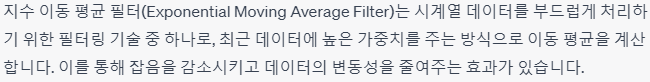

참고: https://spiralmoon.tistory.com/entry/Algorithm-%EC%9D%B4%EB%8F%99-%ED%8F%89%EA%B7%A0-%ED%95%84%ED%84%B0-Moving-average-filter

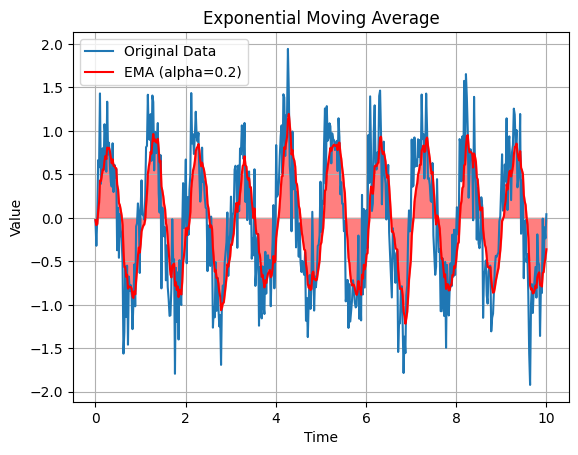

In [311]:
def exponential_moving_average(data, alpha):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[i - 1])
    return np.array(ema)

# 지수 평균 이동 필터 적용 (alpha 값은 smoothing factor로서 0에서 1 사이의 값)
alpha = 0.2
ema = exponential_moving_average(white_sin, alpha)

f=np.linspace(0,10,bits)

# 시계열 데이터와 지수 평균 이동 필터 결과 그래프 그리기
plt.plot(f,white_sin, label='Original Data')
plt.plot(f,ema, label=f'EMA (alpha={alpha})', color='red')
plt.fill_between(f,ema, color= 'red', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.title('Exponential Moving Average')
plt.show()